<a href="https://colab.research.google.com/github/angelakayleesr-cmd/Neural-Networks/blob/main/hotel_booking_demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Memuat Data dan Pemeriksaan Awal ##
Direktori Kerja Saat Ini (cwd): /content
SUCCESS: Data 'hotel_bookings.csv' berhasil dimuat. Jumlah baris: 119390

DataFrame Head (5 Baris Pertama):
          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27     

/tmp/ipython-input-459933869.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hotel', y='cancellation_percent', data=hotel_cancel_rate, palette='viridis')


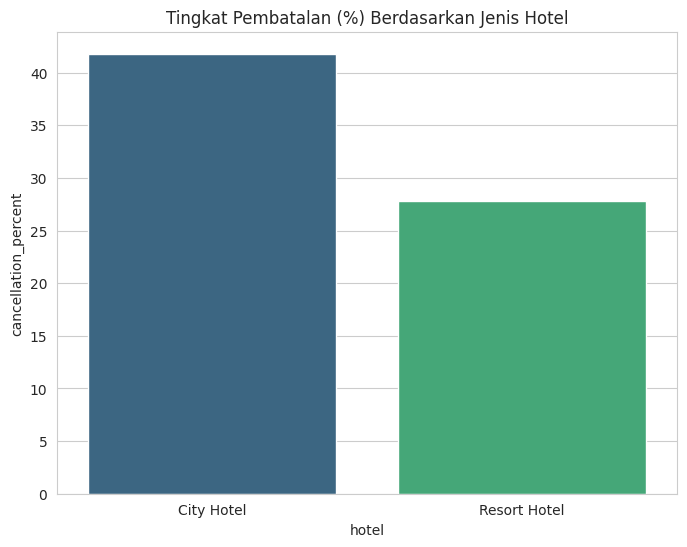

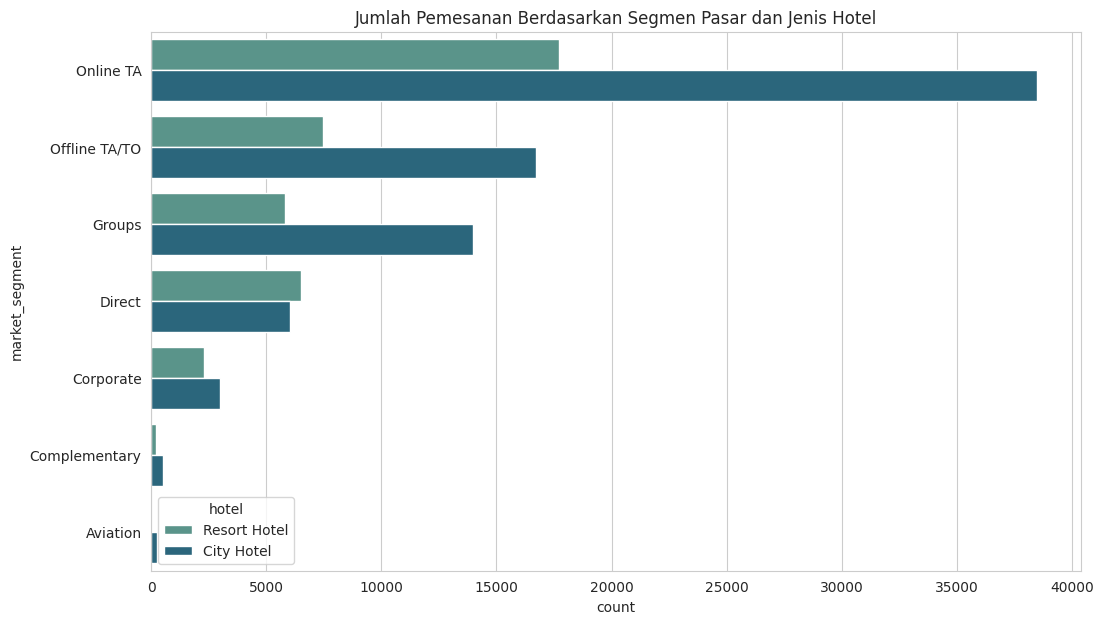


## 4. Analisis Tren Pemesanan Bulanan ##


/tmp/ipython-input-459933869.py:102: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_bookings = df.groupby(['arrival_date_year', 'arrival_date_month']).size().reset_index(name='Total_Bookings')


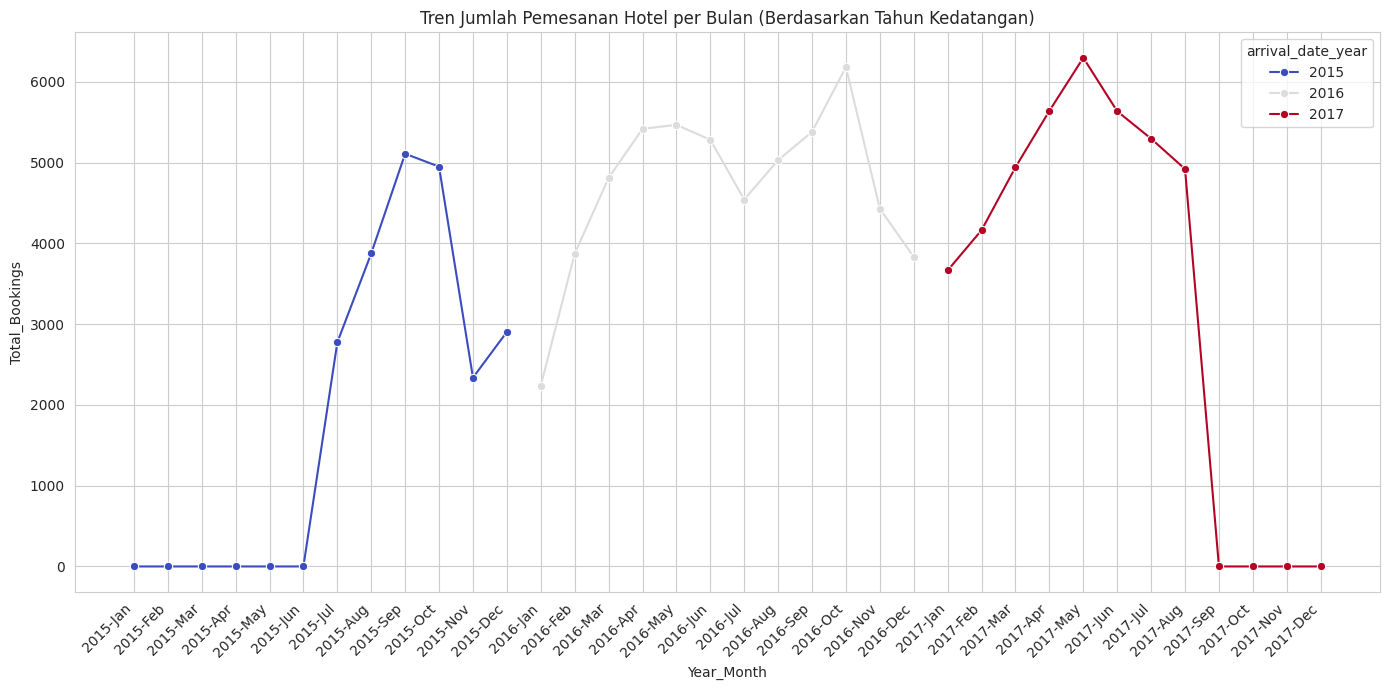


## 5. Analisis Top 10 Negara Asal Tamu ##


/tmp/ipython-input-459933869.py:127: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total_Bookings', y='Country', data=top_10_countries, palette='rocket')


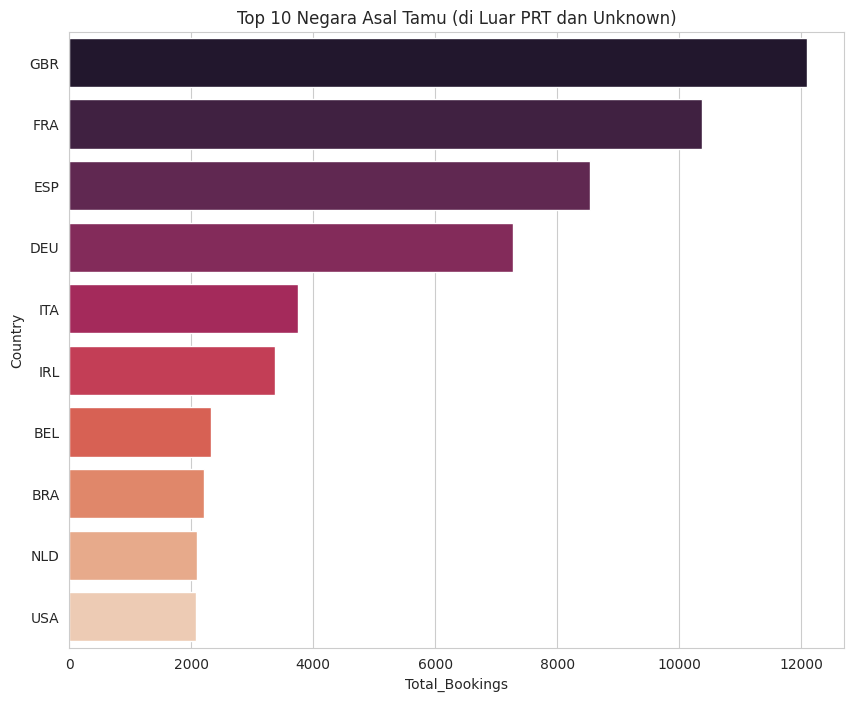


## 6. Analisis Pengaruh Lead Time (Waktu Tunggu) terhadap Pembatalan ##

Tingkat Pembatalan Berdasarkan Kelompok Lead Time:
    lead_time_group  Cancellation_Rate_Percent
0          < 1 Week                   9.584990
1  1 Week - 1 Month                  27.863826
2      1 - 3 Months                  37.743851
3      3 - 6 Months                  44.750815
4        > 6 Months                  57.031409


/tmp/ipython-input-459933869.py:147: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lt_cancel_rate = df.groupby('lead_time_group')['is_canceled'].mean().reset_index(name='Cancellation_Rate')
/tmp/ipython-input-459933869.py:155: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='lead_time_group', y='Cancellation_Rate_Percent', data=lt_cancel_rate, palette='cividis', order=labels)


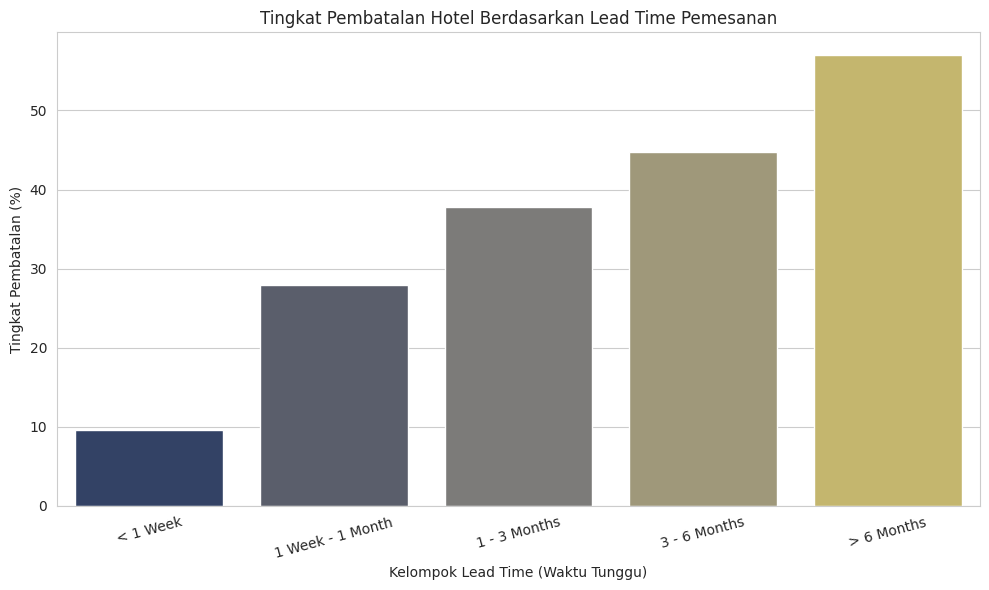

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os # Digunakan untuk verifikasi lokasi file

# Atur gaya visualisasi
sns.set_style('whitegrid')
file_path = 'hotel_bookings.csv'

# Inisialisasi df sebagai None
df = None

# =======================================================
# ## 1. Memuat Data (Dilengkapi Penanganan Error)
# =======================================================
print("=========================================")
print("## 1. Memuat Data dan Pemeriksaan Awal ##")
print("=========================================")

print(f"Direktori Kerja Saat Ini (cwd): {os.getcwd()}")

try:
    # Coba muat file
    df = pd.read_csv(file_path)
    print(f"SUCCESS: Data '{file_path}' berhasil dimuat. Jumlah baris: {len(df)}")
except FileNotFoundError:
    print(f"\n!!! CRITICAL ERROR: File '{file_path}' TIDAK DITEMUKAN. !!!")
    print(">>> Cek nama file: Pastikan sama persis ('hotel_bookings.csv').")
    print(">>> Cek lokasi: Pastikan file berada di direktori (cwd) di atas.")
    df = None # Ensure df is None if file not found

# Lanjutkan hanya jika pemuatan berhasil
if df is not None:
    print("\nDataFrame Head (5 Baris Pertama):")
    print(df.head())

    print("\nDataFrame Info (Tipe Data dan Nilai Non-Null):")
    df.info()

    # =======================================================
    # ## 2. Pembersihan Data
    # =======================================================
    print("\n=========================================")
    print("## 2. Pembersihan Data ##")
    print("=========================================")

    # Menangani Nilai Hilang
    df['country'] = df['country'].fillna('Unknown')
    df['agent'] = df['agent'].fillna(0)
    df['company'] = df['company'].fillna(0)

    # Menghapus Pemesanan Tidak Valid (0 dewasa)
    df = df[df['adults'] > 0]
    df.dropna(subset=['children', 'adults', 'babies'], inplace=True)

    # Konversi Tipe Data
    df['agent'] = df['agent'].astype(int)
    df['company'] = df['company'].astype(int)

    print(f"\nJumlah baris setelah pembersihan: {len(df)}")


    # =======================================================
    # ## 3. Analisis Tingkat Pembatalan (Keseluruhan & Jenis Hotel)
    # =======================================================
    print("\n=======================================================")
    print("## 3. Analisis Tingkat Pembatalan (Keseluruhan & Hotel) ##")
    print("=======================================================")

    cancellation_rate = df['is_canceled'].mean() * 100
    print(f"\n* Tingkat Pembatalan Keseluruhan: {cancellation_rate:.2f}%")

    hotel_cancel_rate = df.groupby('hotel')['is_canceled'].mean().reset_index()
    hotel_cancel_rate['cancellation_percent'] = hotel_cancel_rate['is_canceled'] * 100
    print("\n* Tingkat Pembatalan Berdasarkan Jenis Hotel:")
    print(hotel_cancel_rate[['hotel', 'cancellation_percent']])

    # Visualisasi 3a: Tingkat Pembatalan Berdasarkan Jenis Hotel
    plt.figure(figsize=(8, 6))
    sns.barplot(x='hotel', y='cancellation_percent', data=hotel_cancel_rate, palette='viridis')
    plt.title('Tingkat Pembatalan (%) Berdasarkan Jenis Hotel')
    plt.show()

    # Visualisasi 3b: Distribusi Segmen Pasar
    plt.figure(figsize=(12, 7))
    sns.countplot(y='market_segment', hue='hotel', data=df, order=df['market_segment'].value_counts().index, palette='crest')
    plt.title('Jumlah Pemesanan Berdasarkan Segmen Pasar dan Jenis Hotel')
    plt.show()


    # =======================================================
    # ## 4. Analisis Tren Pemesanan Bulanan
    # =======================================================
    print("\n========================================")
    print("## 4. Analisis Tren Pemesanan Bulanan ##")
    print("========================================")

    month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
                   'August', 'September', 'October', 'November', 'December']
    df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=month_order, ordered=True)
    monthly_bookings = df.groupby(['arrival_date_year', 'arrival_date_month']).size().reset_index(name='Total_Bookings')
    monthly_bookings['Year_Month'] = monthly_bookings['arrival_date_year'].astype(str) + '-' + monthly_bookings['arrival_date_month'].str[:3]

    # Visualisasi 4: Tren Pemesanan Bulanan
    plt.figure(figsize=(14, 7))
    sns.lineplot(x='Year_Month', y='Total_Bookings', hue='arrival_date_year', data=monthly_bookings, marker='o', palette='coolwarm')
    plt.title('Tren Jumlah Pemesanan Hotel per Bulan (Berdasarkan Tahun Kedatangan)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


    # =======================================================
    # ## 5. Analisis Top 10 Negara Asal Tamu
    # =======================================================
    print("\n=========================================")
    print("## 5. Analisis Top 10 Negara Asal Tamu ##")
    print("=========================================")

    country_bookings = df['country'].value_counts().reset_index()
    country_bookings.columns = ['Country', 'Total_Bookings']
    top_10_countries = country_bookings[~country_bookings['Country'].isin(['PRT', 'Unknown'])].head(10)

    # Visualisasi 5: Top 10 Negara Asal Tamu
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Total_Bookings', y='Country', data=top_10_countries, palette='rocket')
    plt.title('Top 10 Negara Asal Tamu (di Luar PRT dan Unknown)')
    plt.show()


    # =======================================================
    # ## 6. Analisis Pengaruh Lead Time terhadap Pembatalan
    # =======================================================
    print("\n==================================================================")
    print("## 6. Analisis Pengaruh Lead Time (Waktu Tunggu) terhadap Pembatalan ##")
    print("==================================================================")

    # Definisikan batas (bins)
    bins = [-1, 7, 30, 90, 180, df['lead_time'].max() + 1]
    labels = ['< 1 Week', '1 Week - 1 Month', '1 - 3 Months', '3 - 6 Months', '> 6 Months']

    # Buat kolom kategori Lead Time
    df['lead_time_group'] = pd.cut(df['lead_time'], bins=bins, labels=labels, right=True)

    # Hitung tingkat pembatalan per kelompok Lead Time
    lt_cancel_rate = df.groupby('lead_time_group')['is_canceled'].mean().reset_index(name='Cancellation_Rate')
    lt_cancel_rate['Cancellation_Rate_Percent'] = lt_cancel_rate['Cancellation_Rate'] * 100

    print("\nTingkat Pembatalan Berdasarkan Kelompok Lead Time:")
    print(lt_cancel_rate[['lead_time_group', 'Cancellation_Rate_Percent']])

    # Visualisasi 6: Lead Time vs. Tingkat Pembatalan
    plt.figure(figsize=(10, 6))
    sns.barplot(x='lead_time_group', y='Cancellation_Rate_Percent', data=lt_cancel_rate, palette='cividis', order=labels)
    plt.title('Tingkat Pembatalan Hotel Berdasarkan Lead Time Pemesanan')
    plt.xlabel('Kelompok Lead Time (Waktu Tunggu)')
    plt.ylabel('Tingkat Pembatalan (%)')
    plt.xticks(rotation=15)
    plt.tight_layout()
    plt.show()
else:
    print("\nData tidak dimuat. Langkah-langkah analisis dan visualisasi selanjutnya dilewati.")


In [ ]:
# Extract the hotel_bookings.csv from the zip archive
import zipfile
import os

zip_file_path = '/content/archive (2).zip'
output_directory = '/content/' # Extract to the current working directory

try:
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(output_directory)
    print(f"SUCCESS: Contents of '{zip_file_path}' extracted to '{output_directory}'")
    # Verify if hotel_bookings.csv is now present
    if 'hotel_bookings.csv' in os.listdir(output_directory):
        print("File 'hotel_bookings.csv' is now available.")
    else:
        print("WARNING: 'hotel_bookings.csv' was not found directly in the extracted contents. Please check the zip file structure.")
except FileNotFoundError:
    print(f"ERROR: Zip file '{zip_file_path}' not found.")
except Exception as e:
    print(f"An error occurred during extraction: {e}")


SUCCESS: Contents of '/content/archive (2).zip' extracted to '/content/'
File 'hotel_bookings.csv' is now available.
